In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

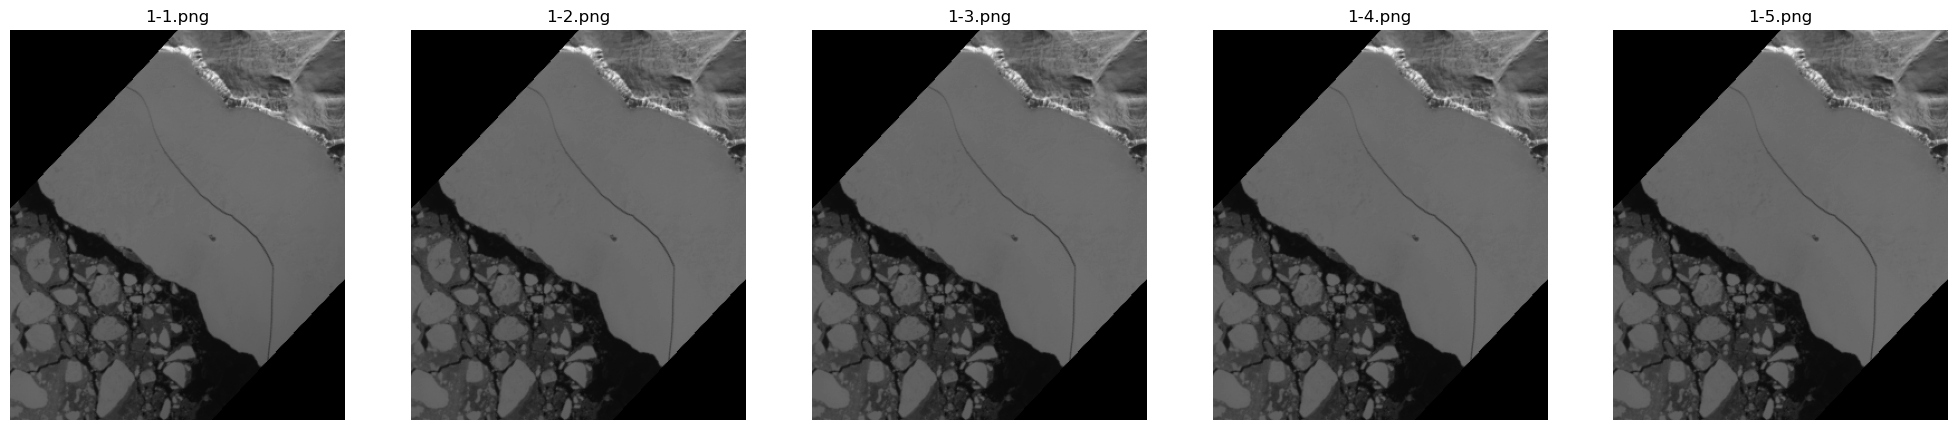

In [2]:
img = []
file = []
for i in range(1,6):
    f = '1-' + str(i) + '.png'
    file.append(f)
    temp = cv.imread(f,0)
    img.append(temp)

plt.figure(figsize=(25,20))
for i in range(0,5): 
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title(file[i])
    plt.imshow(img[i],'gray')
    
plt.show()

In [3]:
print(np.array(img).shape)
print(type(img[0]))
h , w= img[0].shape
print(h,w)

(5, 350, 300)
<class 'numpy.ndarray'>
350 300


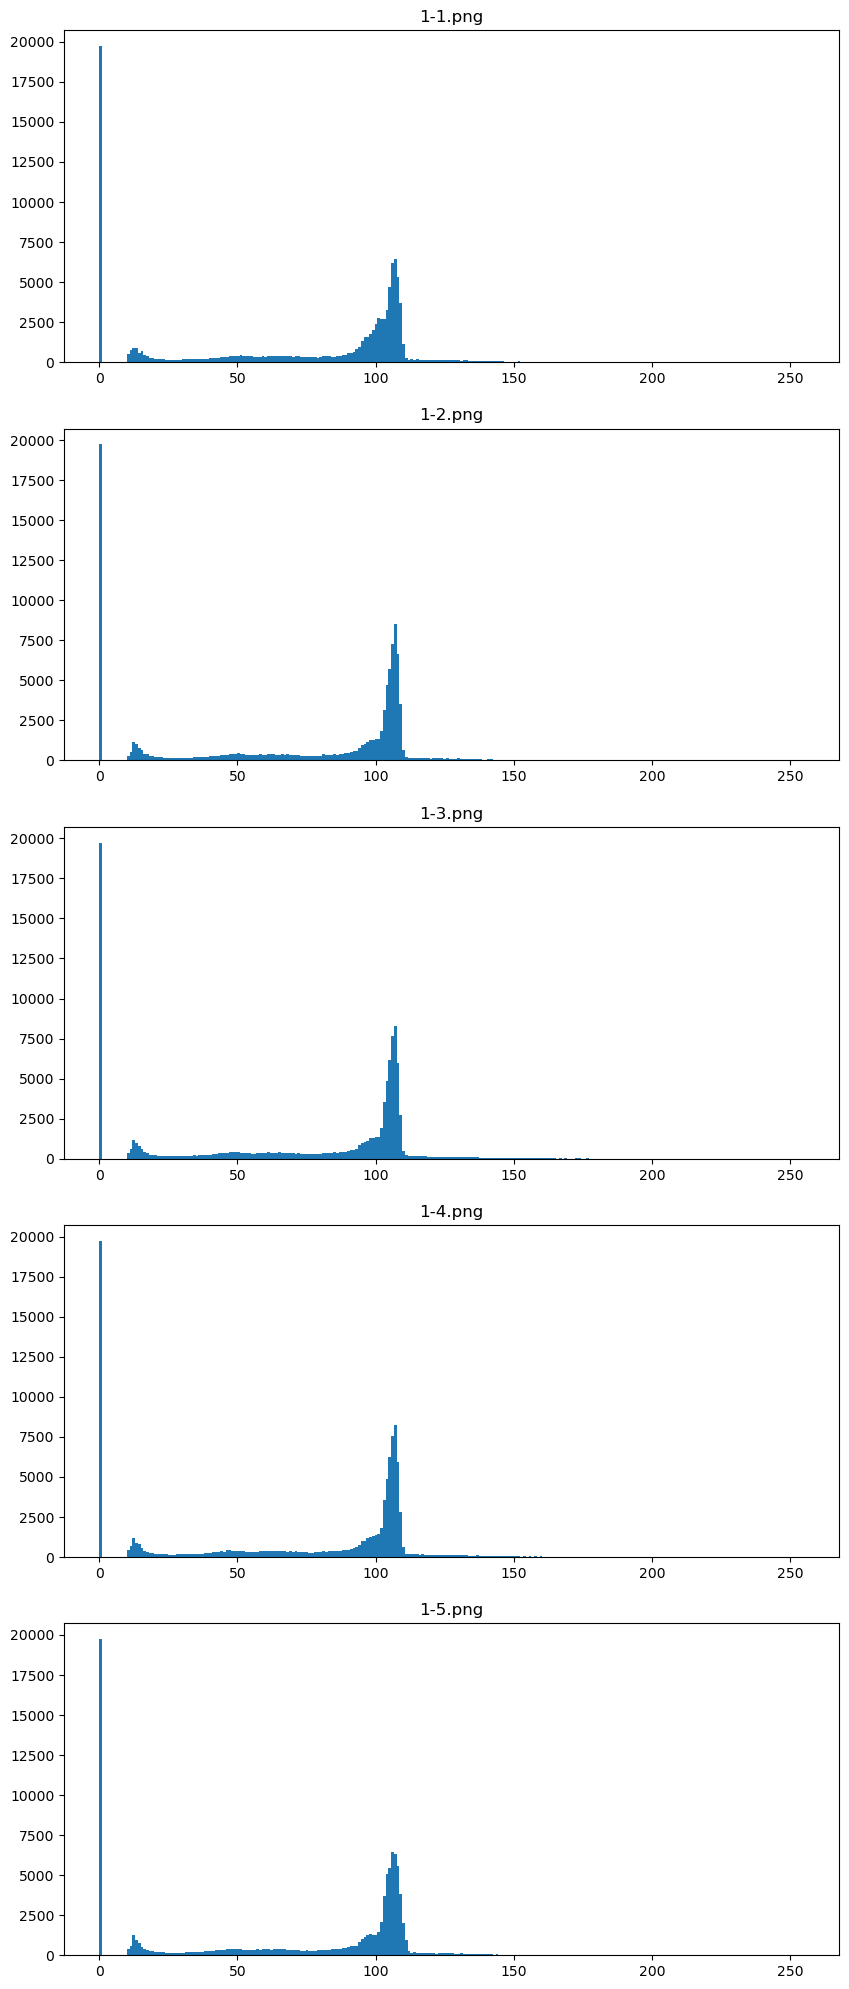

In [4]:
plt.figure(figsize=(10,25))
for i in range(0,5): 
    plt.subplot(5,1,i+1)
    plt.title(file[i])
    plt.hist(img[i].ravel(),256)
plt.show()

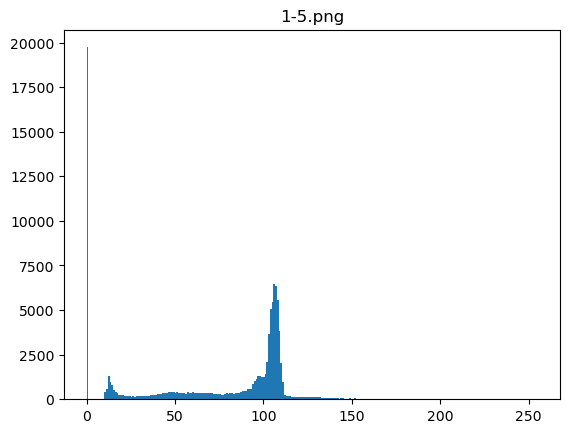

In [5]:
plt.title(file[i])
plt.hist(img[i].ravel(),256)
plt.show()

<ipython-input-6-26d2cbc36a5f>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  z[i][j]=img[0][i][j]+img[1][i][j]+img[2][i][j]+img[3][i][j]+img[4][i][j] / img[2][i][j]


[[  0.           0.           0.         ... 131.         183.99090576
  143.97999573]
 [  0.           0.           0.         ... 102.9887619  145.97999573
   45.99280548]
 [  0.           0.           0.         ... 126.         141.98989868
  172.972229  ]
 ...
 [ 61.          83.          65.         ...   0.           0.
    0.        ]
 [ 38.          21.           9.98484802 ...   0.           0.
    0.        ]
 [ 26.01428604  18.           7.         ...   0.           0.
    0.        ]]
float64
256.03173828125


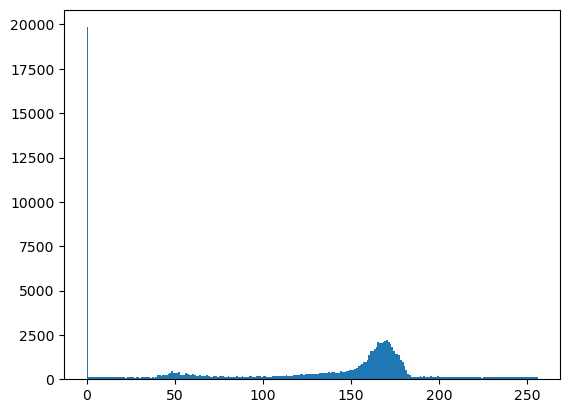

float64


In [6]:
z = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        if img[2][i][j] >= 2:
            z[i][j]=img[0][i][j]+img[1][i][j]+img[2][i][j]+img[3][i][j]+img[4][i][j] / img[2][i][j]
print(z)
print(z.dtype)
print(z.max())

plt.hist(z.ravel(),256)
plt.show()
print(z.dtype)

float64
[[  0.           0.           0.         ... 130.47210562 183.24947245
  143.3997955 ]
 [  0.           0.           0.         ... 102.5737452  145.39173604
   45.80746698]
 [  0.           0.           0.         ... 125.49225426 141.417718
  172.27519796]
 ...
 [ 60.75418659  82.66553257  64.73806768 ...   0.           0.
    0.        ]
 [ 37.84687033  20.91537571   9.9446118  ...   0.           0.
    0.        ]
 [ 25.90945554  17.92746489   6.9717919  ...   0.           0.
    0.        ]]
255


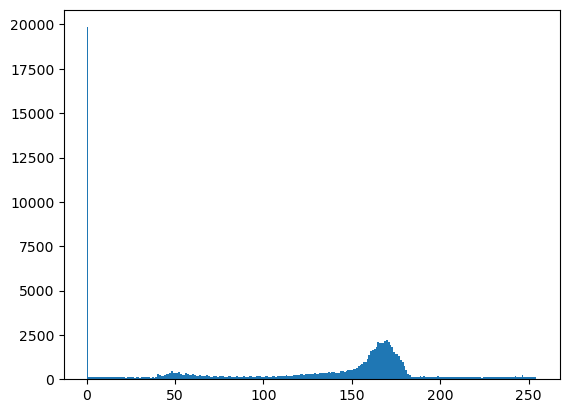

In [7]:
print(z.dtype)
z = 1.0 * z / z.max() *255.0 
print(z)
z = z.astype(np.uint8)
print(z.max())

plt.hist(z.ravel(),256)
plt.show()

In [8]:
th1=0
th2=0
th3=0
th4=0
import time

start = time.perf_counter()
def ostu5layers(img):  # 显示每一个灰度级的像素数概率
    print('Processing:img')
    high, wide = (h,w)
    pixels = cv.calcHist([img], [0], None, [256], [0, 256])  # 计算每个灰度级中所含像素数，返回的是一个（256,1）的数组
    p = pixels / (high * wide)  # 获得每个灰度级中像素数占总像素数比例则我们获得了p_i的一个向量
    x=np.linspace(1,256,256) #灰度级我们定义为从0到255好像不合适这样做平均灰度级时会忽略第一个数据，所以我们定义为从1到256
    x=x.reshape(256,1)  # 这一步是因为我们需要的不是秩为1的向量，可以不加这一句输出看看shape的区别，但这样我们得到了（256,1）的灰度级向量

    maxvar=0
    cnt=0
    for k1 in range(1,50):
        for k2 in range(50,150):
            for k3 in range(k2+1,150):
                for k4 in range(160,200):
                    w0 = np.sum(p[0:1])
                    w1 = np.sum(p[k1:k2])
                    w2 = np.sum(p[k2:k3])
                    w3 = np.sum(p[k3:k4])
                    w4 = np.sum(p[k4:256])  # 注意python是左闭右开np.sum(p[0:256])=1
                    
                    u0 = np.dot(x[0:1].T, p[0:1])
                    u1 = np.dot(x[k1:k2].T, p[k1:k2])
                    u2 = np.dot(x[k2:k3].T, p[k2:k3])
                    u3 = np.dot(x[k3:k4].T, p[k3:k4])
                    u4 = np.dot(x[k4:256].T, p[k4:256])
                    
                    W = np.array([[w0, w1, w2, w3, w4]]).T  # 注意是两层中括号，用np.array组成的向量可以转置,输出矩阵大小等等操作
                    U = np.array([[int(u0), int(u1), int(u2), int(u3), int(u4)]]).T
                    UT = np.sum(U)
                    temp = (U - UT * W) * (U - UT * W) / W
                    varbetween = np.sum(temp)
                    if varbetween>maxvar:
                        cnt=cnt+1
                        maxvar=varbetween
                        th1=k1
                        th2=k2
                        th3=k3
                        th4=k4
                        print("第"+str(cnt)+"次找到最佳阈值："+str(th1)+","+str(th2)+","+str(th3)+","+str(th4)+","+"此时类间方差为"+str(maxvar))
                        end = time.perf_counter()
                        print('Running time: %s Seconds' % (end - start))

ostu5layers(z)
print('th1=',th1)
print('th2=',th2)
print('th3=',th3)
print('th4=',th4)

Processing:img
第1次找到最佳阈值：1,50,51,160,此时类间方差为4877.800797787768
Running time: 0.009509999999998797 Seconds
第2次找到最佳阈值：1,50,51,162,此时类间方差为4908.8607733237295
Running time: 0.010072899999997276 Seconds
第3次找到最佳阈值：1,50,52,160,此时类间方差为4916.726541610885
Running time: 0.020690699999999396 Seconds
第4次找到最佳阈值：1,50,52,161,此时类间方差为4919.406683506393
Running time: 0.021192799999997902 Seconds
第5次找到最佳阈值：1,50,52,162,此时类间方差为4956.273797816012
Running time: 0.021628099999997374 Seconds
第6次找到最佳阈值：1,50,53,160,此时类间方差为4972.703442690691
Running time: 0.03377739999999818 Seconds
第7次找到最佳阈值：1,50,53,162,此时类间方差为5017.188689571805
Running time: 0.035173300000000296 Seconds
第8次找到最佳阈值：1,50,54,162,此时类间方差为5057.058789165969
Running time: 0.042966099999997454 Seconds
第9次找到最佳阈值：1,50,55,162,此时类间方差为5090.324159469965
Running time: 0.05077269999999956 Seconds
第10次找到最佳阈值：1,50,56,162,此时类间方差为5105.688442847084
Running time: 0.06422039999999996 Seconds
第11次找到最佳阈值：1,50,61,162,此时类间方差为5118.551745083519
Running time: 0.12221429999999955 Seco

KeyboardInterrupt: 

In [10]:
#ostu5layers(img)
th1,th2,th3,th4=(1,55,112,191)
print('th1=',th1)
print('th2=',th2)
print('th3=',th3)
print('th4=',th4)


th1= 1
th2= 55
th3= 112
th4= 191


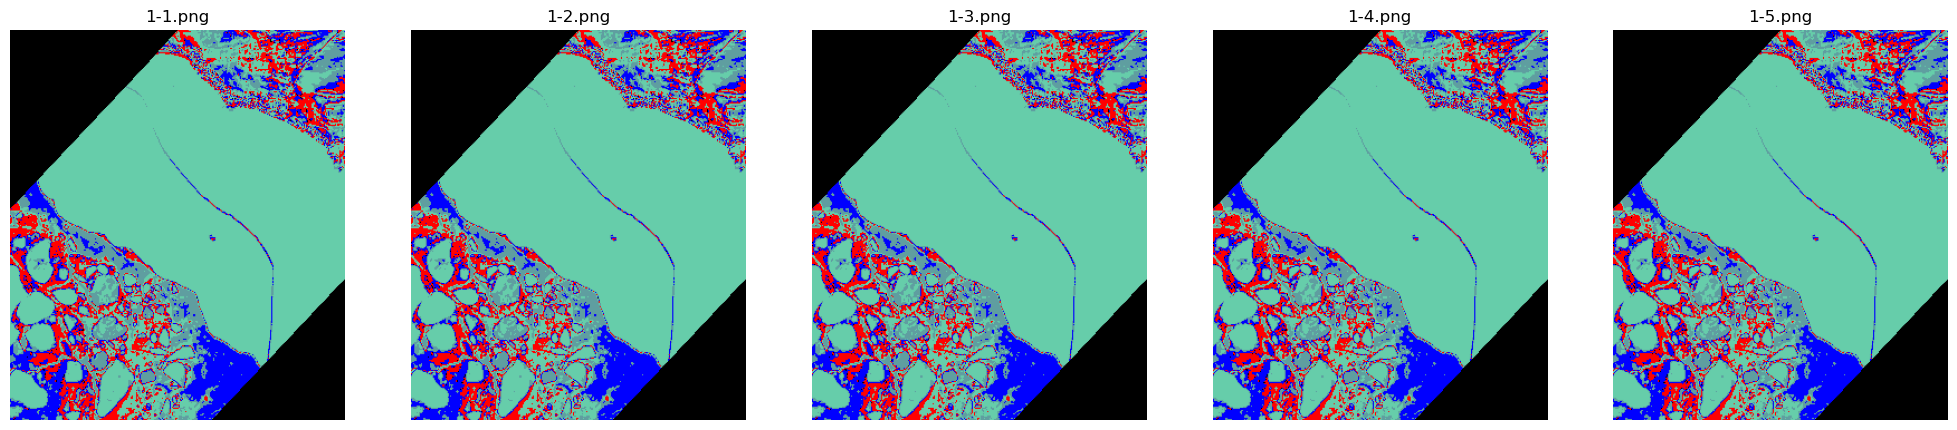

In [12]:
color1 = [0,0,0]     #黑色无用区域
color2 = [0,0,255]  #蓝色 海水
color3 = [95,158,160]   #红色 薄冰
color4 = [102,205,170]   # 厚冰
color5 = [255,0,0]  #红色 陆地
#手工设置阈值点
# th1 = 5
# th2 = 35
# th3 = 90
# th4 = 120
img1 = np.zeros((5, 350, 300,3),dtype=np.uint8)
for i in range(0,5):
    for row in range(0,h):
        for col in range(0,w):
            if z[row][col]<=th1:
                img1[i,row, col]=color1
            elif z[row][col]>th1 and z[row][col]<=th2:
                img1[i,row, col] =color2
            elif z[row][col]>th2 and z[row][col]<=th3:
                img1[i,row, col] = color3
            elif z[row][col]>th3 and z[row][col]<=th4:
                img1[i,row, col] = color4
            elif z[row][col]>th4:
                img1[i,row, col] = color5
plt.figure(figsize=(25,20))
for i in range(0,5): 
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title(file[i])
    plt.imshow(img1[i])
plt.show()